In [93]:
import pandas as pd
from turtle import color
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from pyclustering.cluster.clique import clique, clique_visualizer

In [94]:
# pip install pyclustering

In [95]:
df = pd.read_csv("Mall_Customers.csv")

In [96]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [99]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## K-Means (Partitioning)

In [100]:
k_means = KMeans(n_clusters=5)
k_means.fit(X)

KMeans(n_clusters=5)

In [101]:
k_means.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [102]:
centers = k_means.cluster_centers_
centers

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

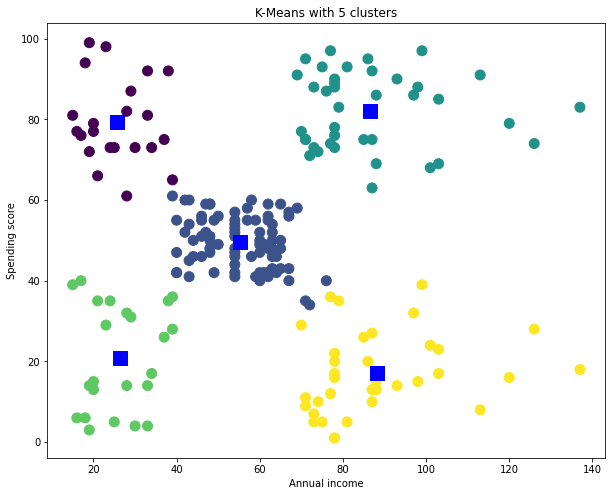

In [146]:
plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=k_means.labels_,
            s=100)

plt.scatter(centers[:,0], centers[:,1], color="b", s=200, marker="s")

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("K-Means with 5 clusters")
plt.show()

## BIRCH (Hierarchical)

In [104]:
birch = Birch(threshold=0.01, n_clusters=5)
birch.fit(X)

Birch(n_clusters=5, threshold=0.01)

In [105]:
set(birch.labels_)

{0, 1, 2, 3, 4}

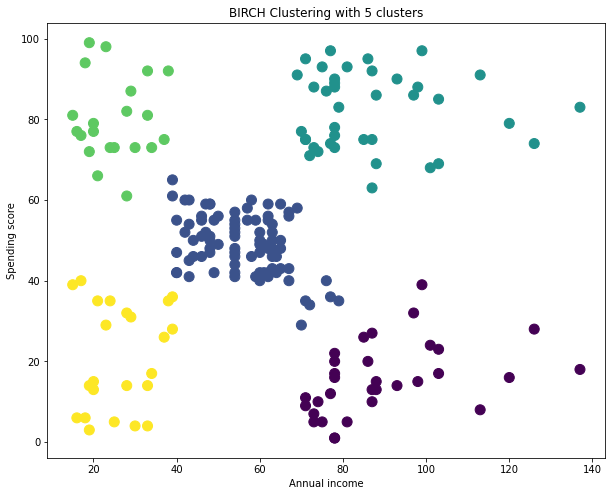

In [106]:
plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=birch.labels_,
            s=100)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("BIRCH Clustering with 5 clusters")
plt.show()

## Agglomerative Clustering (Hiearcichal)

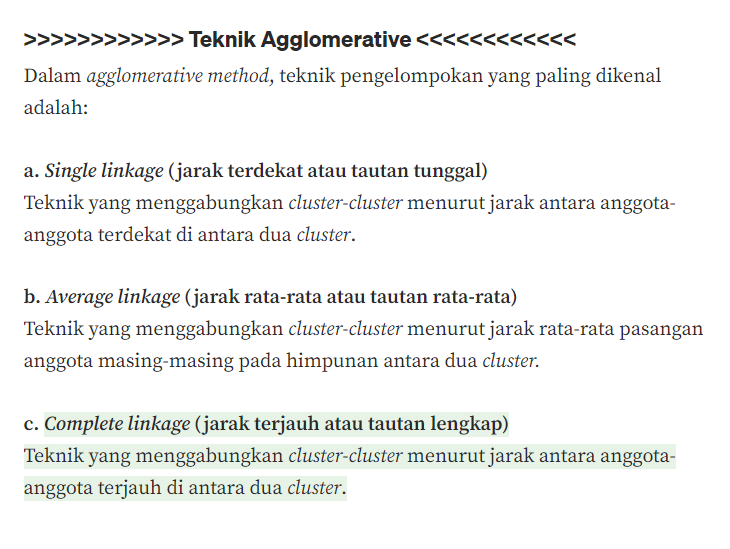

In [160]:
agg = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="complete")
agg.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

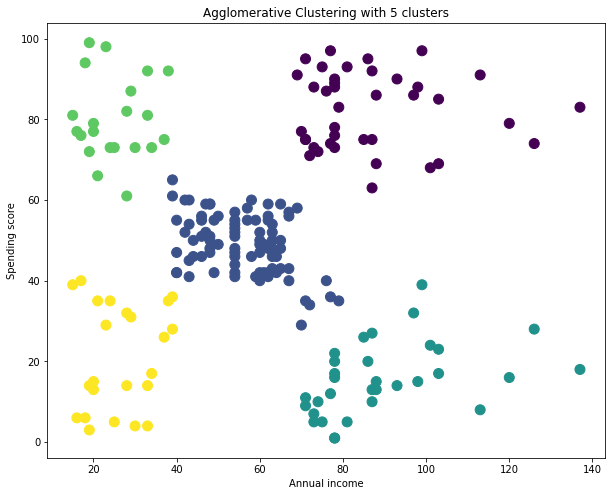

In [161]:
plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=agg.labels_,
            s=100)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Agglomerative Clustering with 5 clusters")
plt.show()

## DBScan (Density)

In [143]:
dbscan = DBSCAN(eps=9, min_samples=3).fit(X)

In [144]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6}

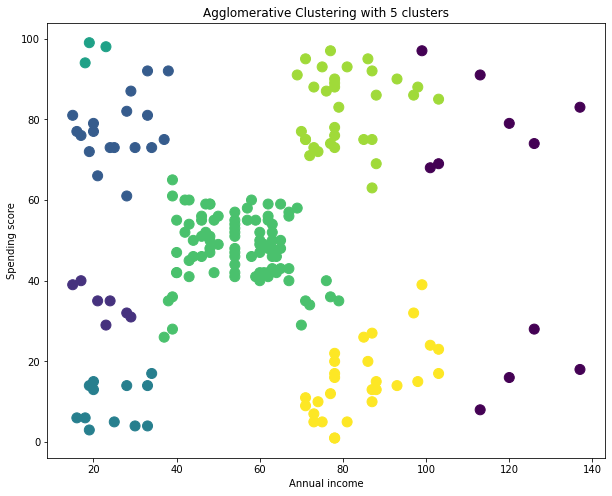

In [145]:
plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=dbscan.labels_,
            s=100)

# plt.scatter(centers[:,0], centers[:,1], color="blue", s=200)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("DBScan")
plt.show()

## CLIQUE (Grid)

In [155]:
clique_instance = clique(X, amount_intervals=2, density_threshold=3)

# clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))


# clique_visualizer.show_grid(cells, P)    # show grid that has been formed by the algorithm
# clique_visualizer.show_clusters(P, clusters, noise)  # show clustering results

Amount of clusters: 0
